In [16]:
# Feed forward neural network using keras

In [17]:
# a. importing necessary libraries
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random  

In [18]:
# b.  import dataset and split into train and test data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [19]:
x_train = x_train / 255
x_test = x_test / 255

In [20]:
# c. Define network architecture using keras 

model = keras.Sequential([
keras.layers.Flatten(input_shape=(28, 28)),
keras.layers.Dense(128, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# d. Train model using SGD
model.compile(optimizer="sgd",   #sdg used to minimize the loss function
loss="sparse_categorical_crossentropy",
metrics=['accuracy'])

In [22]:

history=model.fit(x_train,
y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7244 - loss: 1.0515 - val_accuracy: 0.9008 - val_loss: 0.3605
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9010 - loss: 0.3581 - val_accuracy: 0.9164 - val_loss: 0.2937
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9156 - loss: 0.2976 - val_accuracy: 0.9253 - val_loss: 0.2626
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9255 - loss: 0.2651 - val_accuracy: 0.9333 - val_loss: 0.2383
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9330 - loss: 0.2410 - val_accuracy: 0.9381 - val_loss: 0.2198
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9377 - loss: 0.2222 - val_accuracy: 0.9426 - val_loss: 0.2081
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9433 - loss: 0.2030 - val_accuracy: 0.9450 - val_loss: 0.1940
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9475 - loss: 0.1911 - 

In [23]:
# e. Evaluate the network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9434 - loss: 0.1926
Loss=0.163
Accuracy=0.953


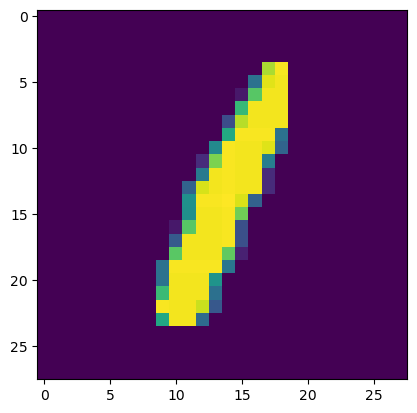

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


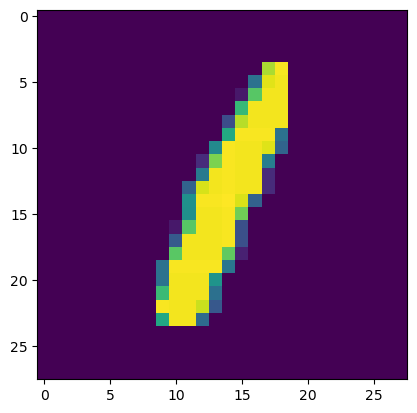

Predicted Value:  [1.4938778e-05 9.9038965e-01 1.8071139e-03 7.7787472e-04 4.4256696e-05
 3.3781686e-04 6.2369579e-04 7.4202289e-05 5.8493321e-03 8.1285165e-05]


In [25]:
n=random.randint(0,9999) #getting random number
plt.imshow(x_test[n]) 
plt.show()
predicted_value=model.predict(x_test)
plt.imshow((x_test[n]))
plt.show()           

print('Predicted Value: ' , predicted_value[n])           

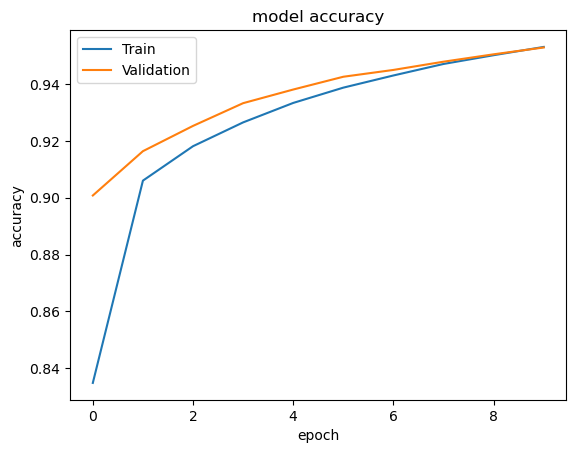

In [26]:
# f. Plot the training loss accuracy

# Plotting the Training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

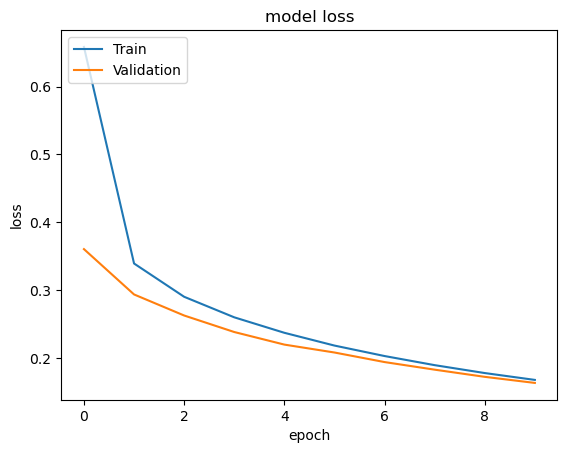

In [27]:
# Plottong the training loss


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()